# Homophobia and Misogyny in Rap and Hip Hop
*by Ankush Bharadwaj*

### Question
How has the use of homophobic and misogynistic slurs in rap and hip hop music changed over the years?

## Web scrape albums

The first step is to scrape the list of albums to use as our sample of popular rap and hip hop albums over time. To do this, the requests library will be used to generate a Response object that has all the needed information. Next, the Beautiful Soup library will help access the text data stored in our Response object to generate a DataFrame with the albums' name, year they charted, and artist. 

The albums scraped are from the following link: http://davesmusicdatabase.blogspot.com/2011/07/the-top-50-rap-albums-of-all-time.html. This list is an aggregation of more than 25 other lists, and therefore, it stands to reason that the albums included in this list are very popular albums that are indications of the genre's standard at the respective points in time the albums charted. 

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = 'http://davesmusicdatabase.blogspot.com/2011/07/the-top-50-rap-albums-of-all-time.html'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

albums = []
for data in soup.find_all('i'):
    albums.append(data.get_text())

albums = albums[2:]
albums[54] = albums[54].split(' ',1)[-1]

album_data = []
for data in soup.find_all('p'):
    album_data.append(data.get_text())

album_data = [i.split('\n') for i in album_data][2]
album_data = list(filter(None, album_data))
album_data = album_data[1:]

album_year = [i.strip().split('(')[-1].replace(')', '') for i in album_data]
album_year = [i.split(' ')[-1] for i in album_year]
album_year[album_year.index('3/15/15')] = '2015'
from datetime import datetime
album_year = [datetime.strptime(i, '%Y') for i in album_year]

album_artist = []
counter = 0
for i in album_data:
    album_name = albums[counter]
    artist_data = i[:i.find(album_name)]
    album_artist.append(artist_data)
    counter += 1
album_artist[57] = 'Run-D.M.C.'
album_artist[64] = 'Cypress Hill'
album_artist = [i.strip().split('. ',1)[-1] for i in album_artist]

Time to take a pause and make sure that the lengths of all of these lists that contain different information about the album are of the same length before using them to generate the DataFrame.

In [2]:
print('Album Names: {}\nAlbum Years: {}\nAlbum Artists: {}'.format(len(albums),len(album_year),len(album_artist)))

Album Names: 100
Album Years: 100
Album Artists: 100


In [3]:
albums_df = pd.DataFrame(columns = ['album_name', 'album_year'])
albums_df['album_name'] = albums
albums_df['album_year'] = album_year
albums_df['album_artist'] = album_artist

pd.set_option('display.max_rows', None)
albums_df

,album_name,album_year,album_artist
0,It Takes a Nation of Millions to Hold Us Back,1988-01-01,Public Enemy
1,The Marshall Mathers LP,2000-01-01,Eminem
2,The Miseducation of Lauryn Hill,1998-01-01,Lauryn Hill
3,The Eminem Show,2002-01-01,Eminem
4,Licensed to Ill,1986-01-01,Beastie Boys
5,Straight Outta Compton,1989-01-01,N.W.A.
6,Speakerboxxx/The Love Below,2003-01-01,OutKast
7,Paul’s Boutique,1989-01-01,Beastie Boys
8,3 Feet High and Rising,1989-01-01,De La Soul
9,Please Hammer Don’t Hurt ‘Em,1990-01-01,MC Hammer


Text(2000-01-01 00:00:00, 14, 'Mean: 1999-03-29 18:28:48')

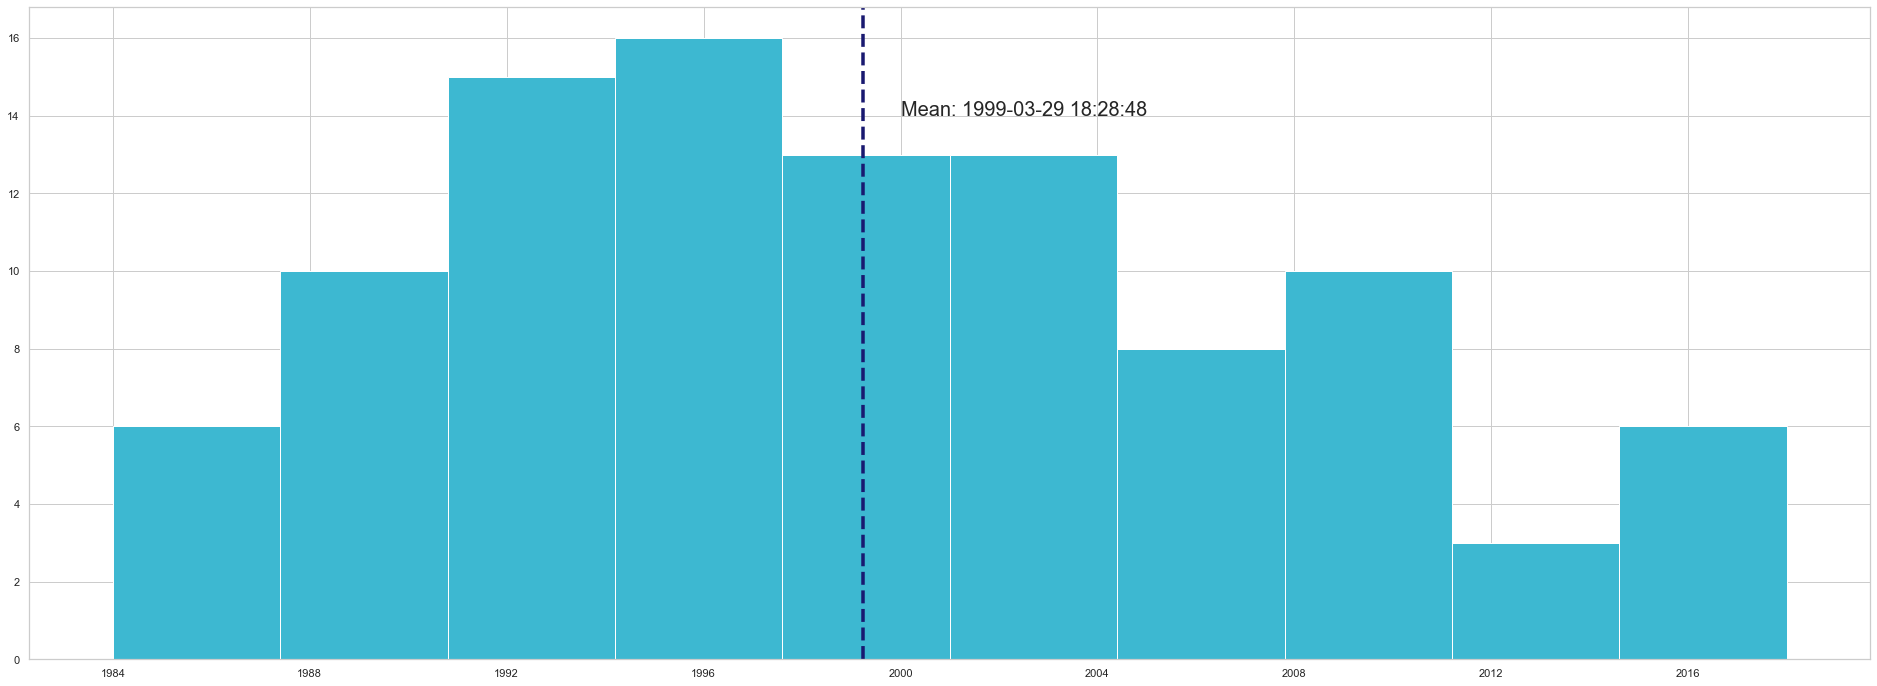

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(33, 12)})
sns.set_style("whitegrid")
sns.set_palette(sns.husl_palette(1, h = .6, l = .7))

plt.hist(albums_df['album_year'])
plt.axvline(albums_df['album_year'].mean(), linestyle='dashed', linewidth = 3.5, color = 'midnightblue')
plt.text(datetime.strptime('2000', '%Y'),14, fontsize=20, s = 'Mean: {}'.format(albums_df['album_year'].mean()))

By visualizing the distribution of the years, it's possible to notice any inherent skew in the year each of the albums in our dataset charted. Although there is a slight right skew, with most of the albums falling left of the mean, I don't believe resampling is required. However, this skew should be kept in mind when explaining the results.

## Acquire track list for each album

Next, the track list for each of the albums must be acquired. To scrape the track list, genius.com will be accessed. Once again, the requests library will be used to store information from each URL in a Response object, which will then be worked on via the Beautiful Soup library to add track lists to each of the albums in the DataFrame. 

To acquire the track list for each album as efficiently as possible, a loop that accesses each album's track list one at a time will be constructred. Each iteration of the loop, the URL will need to be altered depending on the album and artist. However, if the resulting tracklist comes out empty, this means that something went wrong with the automatic URL formatting, in which case the list will indicate an error at that location. After the loop is done running, locations at which an error is found would require manual URL input to access the tracklist.

In [5]:
url = 'https://genius.com/albums/{}/{}'
all_tracklists = []

for i in range(0,len(albums_df)):
    current_album = albums_df.iloc[i]['album_name'].replace(' ','-')
    current_artist = albums_df.iloc[i]['album_artist'].replace(' ','-')
    
    page = requests.get(url.format(current_artist, current_album))
    soup = BeautifulSoup(page.text, 'html.parser')
    
    current_tracklist = []
    
    songs = soup.find_all('h3', attrs = {'class': 'chart_row-content-title'})
    for song in songs:
        current_tracklist.append(song.get_text())
    
    if len(current_tracklist) != 0:
        current_tracklist = [i.replace('\n','').replace('Lyrics','').strip() for i in current_tracklist]
        all_tracklists.append(current_tracklist)
    else:
        all_tracklists.append(['Error at: {}, {}'.format(current_album, current_artist)])

From here, after looking at the list of track lists that resulted in an error, the list of replacement URLs that weren't caught by the pattern can be compiled. Afterwards, a dictionary that links the error message in the overall track list list object to the new URL will be constructed. Then, the overall tracklist list object will be modified to include the tracklists for the albums that were missed.

In [6]:
error_tracklists = []
for i in all_tracklists:
    if len(i) == 1:
        error_tracklists.append(i[0])
        
error_tracklists = {key: None for key in error_tracklists}
error_tracklists

{'Error at: Straight-Outta-Compton, N.W.A.': None,
 'Error at: Speakerboxxx/The-Love-Below, OutKast': None,
 'Error at: Paul’s-Boutique, Beastie-Boys': None,
 'Error at: Please-Hammer-Don’t-Hurt-‘Em, MC-Hammer': None,
 'Error at: The-Chronic, Dr.-Dre': None,
 'Error at: Endtroducing…, DJ-Shadow': None,
 'Error at: The-Score, The-Fugees': None,
 'Error at: Get-Rich-Or-Die-Tryin’, 50-Cent': None,
 'Error at: Curtain-Call:-The-Hits, Eminem:': None,
 'Error at: Damn., Kendrick-Lamar:': None,
 'Error at: Enter-the-Wu-Tang-(36-Chambers), Wu-Tang-Clan': None,
 'Error at: Raising-Hell, Run-D.M.C.': None,
 'Error at: Paid-in-Full, Eric-B.-&-Rakim': None,
 'Error at: Doggystyle, Snoop-Doggy-Dogg': None,
 'Error at: To-Pimp-a-Butterfly, Kendrick-Lamar:': None,
 'Error at: Ready-to-Die, The-Notorious-B.I.G.': None,
 'Error at: My-Beautiful-Dark-Twisted-Fantasy, Kanye-West:': None,
 'Error at: Life-after-Death, The-Notorious-B.I.G.': None,
 'Error at: 8-Mile, Eminem/various-artists': None,
 'Error 

In [7]:
error_new_url = ['https://genius.com/albums/Nwa/Straight-outta-compton',
                'https://genius.com/albums/Outkast/Speakerboxxx-the-love-below',
                'https://genius.com/albums/Beastie-boys/Paul-s-boutique',
                'https://genius.com/albums/Mc-hammer/Please-hammer-don-t-hurt-em',
                'https://genius.com/albums/Dr-dre/The-chronic',
                'https://genius.com/albums/Dj-shadow/Endtroducing',
                'https://genius.com/albums/Fugees/The-score',
                'https://genius.com/albums/50-cent/Get-rich-or-die-tryin',
                'https://genius.com/albums/Eminem/Curtain-call-the-hits-deluxe-version',
                'https://genius.com/albums/Kendrick-lamar/Damn',
                'https://genius.com/albums/Wu-tang-clan/Enter-the-wu-tang-36-chambers',
                'https://genius.com/albums/Run-dmc/Raising-hell',
                'https://genius.com/albums/Eric-b-and-rakim/Paid-in-full',
                'https://genius.com/albums/Snoop-dogg/Doggystyle',
                'https://genius.com/albums/Kendrick-lamar/To-pimp-a-butterfly',
                'https://genius.com/albums/The-notorious-big/Ready-to-die',
                'https://genius.com/albums/Kanye-west/My-beautiful-dark-twisted-fantasy',
                'https://genius.com/albums/The-notorious-big/Life-after-death',
                'https://genius.com/albums/Shady-records/8-mile-music-from-and-inspired-by-the-motion-picture',
                'https://genius.com/albums/Kendrick-lamar/Good-kid-m-a-a-d-city',
                'https://genius.com/albums/Arrested-development/3-years-5-months-and-2-days-in-the-life-of',
                'https://genius.com/albums/Dr-dre/2001',
                'https://genius.com/albums/A-tribe-called-quest/Peoples-instinctive-travels-and-the-paths-of-rhythm',
                'https://genius.com/albums/Run-dmc/Run-d-m-c',
                'https://genius.com/albums/Drake/If-youre-reading-this-its-too-late',
                'https://genius.com/albums/Diddy/No-way-out',
                'https://genius.com/albums/Jay-z/Vol-2-hard-knock-life',
                'https://genius.com/albums/Post-malone/Beerbongs-bentleys',
                'https://genius.com/albums/Jay-z-and-kanye-west/Watch-the-throne',
                'https://genius.com/albums/Nicki-minaj/Pink-friday-roman-reloaded',
                'https://genius.com/albums/Missy-elliott/Supa-dupa-fly',
                'https://genius.com/albums/Ice-cube/Amerikkkas-most-wanted',
                'https://genius.com/albums/Dmx/Its-dark-and-hell-is-hot',
                'https://genius.com/albums/Bone-thugs-n-harmony/E-1999-eternal',
                'https://genius.com/albums/Ti/King',
                'https://genius.com/albums/Dj-jazzy-jeff-and-the-fresh-prince/Hes-the-dj-im-the-rapper',
                'https://genius.com/albums/Ti/Paper-trail',
                'https://genius.com/albums/Kanye-west/808s-heartbreak',
                'https://genius.com/albums/2pac/The-don-killuminati-the-7-day-theory',
                'https://genius.com/albums/Raekwon/Only-built-4-cuban-linx',
                'https://genius.com/albums/Gza/Liquid-swords']

counter = 0
for i in error_tracklists:
    error_tracklists[i] = error_new_url[counter]
    counter+=1

It's time to fix the incorrect tracklists.

In [8]:
for i in error_tracklists:
    url = error_tracklists[i]
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    
    current_tracklist = []
    
    songs = soup.find_all('h3', attrs = {'class': 'chart_row-content-title'})
    for song in songs:
        current_tracklist.append(song.get_text())
    
    if len(current_tracklist) != 0:
        current_tracklist = [i.replace('\n','').replace('Lyrics','').strip() for i in current_tracklist]
        all_tracklists[all_tracklists.index([i])] = current_tracklist

Now, just to make sure that there aren't any remaining incorrect track lists and ensure that the overall list of track lists has the same length as the overall DataFrame. 

In [9]:
for i in all_tracklists:
    if len(i) == 1:
        print(i)
print(len(all_tracklists))

100


And finally, the track lists need to be added to the overall DataFrame.

In [10]:
albums_df['album_tracklist'] = all_tracklists
albums_df

,album_name,album_year,album_artist,album_tracklist
0,It Takes a Nation of Millions to Hold Us Back,1988-01-01,Public Enemy,"[Countdown to Armageddon, Bring the Noise, Don..."
1,The Marshall Mathers LP,2000-01-01,Eminem,[Public Service Announcement 2000 (Ft. Jeff Ba...
2,The Miseducation of Lauryn Hill,1998-01-01,Lauryn Hill,"[Intro, Lost Ones, Ex-Factor, To Zion (Ft. Car..."
3,The Eminem Show,2002-01-01,Eminem,"[Curtains Up (Skit) [2002], White America, Bus..."
4,Licensed to Ill,1986-01-01,Beastie Boys,"[Rhymin & Stealin, The New Style (Ft. DJ Hurri..."
5,Straight Outta Compton,1989-01-01,N.W.A.,"[Straight Outta Compton, Fuck tha Police, Gang..."
6,Speakerboxxx/The Love Below,2003-01-01,OutKast,"[Intro (Speakerboxxx) by Big Boi, GhettoMusick..."
7,Paul’s Boutique,1989-01-01,Beastie Boys,"[To All the Girls, Shake Your Rump, Johnny Rya..."
8,3 Feet High and Rising,1989-01-01,De La Soul,"[Intro, The Magic Number, Change in Speak, Coo..."
9,Please Hammer Don’t Hurt ‘Em,1990-01-01,MC Hammer,"[Here Comes the Hammer, U Can't Touch This, Ha..."


## Establish corpus of lyrics

Now that the overall DataFrame has each album name, the album's release date, the album's artist, and the album's track list, it's time to put together the lyrics for each album and establish a corpus of lyrics. In this context, the corpus would be all of the lyrics from each track in each album in the DataFrame. However, establishing the corpus of lyrics must be done such that the lyrics from each song in each album can still be selected easily, as this differentiation is crucial to the text analysis. 

To access the lyrics from each song in an album, genius.com will be used again. A loop will cycle through each of the albums in the DataFrame and each song in the album, formatting the URL to pull lyrics for that specific song. The lyrics for each song in an album will be combined into a list, where each element of the list is a string that includes all the lyrics for each song in the album. The list of lyrics for songs in an album will be added to a growing list of list of lyrics for songs in each album in the DataFrame, which will finally be added into the DataFrame. Similar error detection methods as before will be employed. 

In [22]:
import string

punct = str.maketrans(' ', ' ', string.punctuation)
url = 'https://genius.com/{}-{}-lyrics'
        
album_lyrics = []
list_of_errors = []

for album in range(0, len(albums_df)):
    artist_str = albums_df.iloc[album]['album_artist'].strip().translate(punct).replace(' ','-').lower()
    current_album = []
    print('Artist: {}'.format(artist_str))
    
    for song in albums_df.iloc[album]['album_tracklist']:
        if 'Ft.' in song:
            song_str = song[:song.index('Ft.')].translate(punct).strip().replace(' ','-').lower()
        else:
            song_str = song.strip().translate(punct).replace(' ','-').lower()
        print('Song: {}'.format(song_str))
        current_url = url.format(artist_str,song_str)
        print('URL: {}'.format(current_url))
        try:
            page = requests.get(current_url)
            soup = BeautifulSoup(page.text, 'html.parser')
            lyrics = soup.find_all('div', attrs = {'class':"song_body column_layout"})
            current_song = ''
            for lyric in lyrics:
                current_song = lyric.get_text()

            current_song = current_song.translate(punct)
            current_song = current_song.replace('\n', ' ')
            current_song = current_song[current_song.index('Lyrics')+6:current_song.index('More on Genius')]
            current_song = current_song.strip()
            current_album.append(current_song)
        except:
            list_of_errors.append('Error at album {} and song titled {}'.format(album,song))
            current_album.append('Error at album {} and song titled {}'.format(album,song))
            print('ERROR at above song.')
            pass
    print('-------------------------')
    album_lyrics.append(current_album)

Artist: public-enemy
Song: countdown-to-armageddon
URL: https://genius.com/public-enemy-countdown-to-armageddon-lyrics
Song: bring-the-noise
URL: https://genius.com/public-enemy-bring-the-noise-lyrics
Song: dont-believe-the-hype
URL: https://genius.com/public-enemy-dont-believe-the-hype-lyrics
Song: cold-lampin-with-flavor
URL: https://genius.com/public-enemy-cold-lampin-with-flavor-lyrics
Song: terminator-x-to-the-edge-of-panic
URL: https://genius.com/public-enemy-terminator-x-to-the-edge-of-panic-lyrics
Song: mind-terrorist
URL: https://genius.com/public-enemy-mind-terrorist-lyrics
Song: louder-than-a-bomb
URL: https://genius.com/public-enemy-louder-than-a-bomb-lyrics
Song: caught-can-we-get-a-witness
URL: https://genius.com/public-enemy-caught-can-we-get-a-witness-lyrics
Song: show-em-whatcha-got
URL: https://genius.com/public-enemy-show-em-whatcha-got-lyrics
Song: she-watch-channel-zero
URL: https://genius.com/public-enemy-she-watch-channel-zero-lyrics
Song: night-of-the-living-bas

Song: bonus-beats
URL: https://genius.com/nwa-bonus-beats-lyrics
Song: straight-outta-compton-extended-mix
URL: https://genius.com/nwa-straight-outta-compton-extended-mix-lyrics
Song: a-bitch-iz-a-bitch
URL: https://genius.com/nwa-a-bitch-iz-a-bitch-lyrics
-------------------------
Artist: outkast
Song: intro-speakerboxxx-by big boi
URL: https://genius.com/outkast-intro-speakerboxxx-by big boi-lyrics
ERROR at above song.
Song: ghettomusick
URL: https://genius.com/outkast-ghettomusick-lyrics
Song: unhappy-by big boi
URL: https://genius.com/outkast-unhappy-by big boi-lyrics
ERROR at above song.
Song: bowtie-by big boi
URL: https://genius.com/outkast-bowtie-by big boi-lyrics
ERROR at above song.
Song: the-way-you-move-by big boi
URL: https://genius.com/outkast-the-way-you-move-by big boi-lyrics
ERROR at above song.
Song: the-rooster-by big boi
URL: https://genius.com/outkast-the-rooster-by big boi-lyrics
ERROR at above song.
Song: bust-by big boi
URL: https://genius.com/outkast-bust-by bi

Song: do-as-de-la-does
URL: https://genius.com/de-la-soul-do-as-de-la-does-lyrics
Song: plug-tunin-last-chance-to-comprehend
URL: https://genius.com/de-la-soul-plug-tunin-last-chance-to-comprehend-lyrics
Song: de-la-orgee
URL: https://genius.com/de-la-soul-de-la-orgee-lyrics
Song: buddy
URL: https://genius.com/de-la-soul-buddy-lyrics
Song: description
URL: https://genius.com/de-la-soul-description-lyrics
Song: me-myself-and-i
URL: https://genius.com/de-la-soul-me-myself-and-i-lyrics
Song: this-is-a-recording-for-living-in-a-fulltime-era-life
URL: https://genius.com/de-la-soul-this-is-a-recording-for-living-in-a-fulltime-era-life-lyrics
Song: i-can-do-anything-delacratic
URL: https://genius.com/de-la-soul-i-can-do-anything-delacratic-lyrics
Song: daisy-age
URL: https://genius.com/de-la-soul-daisy-age-lyrics
Song: plug-tunin-12-version
URL: https://genius.com/de-la-soul-plug-tunin-12-version-lyrics
-------------------------
Artist: mc-hammer
Song: here-comes-the-hammer
URL: https://geniu

-------------------------
Artist: jayz
Song: the-rulers-back
URL: https://genius.com/jayz-the-rulers-back-lyrics
ERROR at above song.
Song: takeover
URL: https://genius.com/jayz-takeover-lyrics
ERROR at above song.
Song: izzo-hova
URL: https://genius.com/jayz-izzo-hova-lyrics
ERROR at above song.
Song: girls-girls-girls
URL: https://genius.com/jayz-girls-girls-girls-lyrics
ERROR at above song.
Song: jigga-that-nigga
URL: https://genius.com/jayz-jigga-that-nigga-lyrics
ERROR at above song.
Song: u-dont-know
URL: https://genius.com/jayz-u-dont-know-lyrics
ERROR at above song.
Song: hola-hovito
URL: https://genius.com/jayz-hola-hovito-lyrics
ERROR at above song.
Song: heart-of-the-city-aint-no-love
URL: https://genius.com/jayz-heart-of-the-city-aint-no-love-lyrics
ERROR at above song.
Song: never-change
URL: https://genius.com/jayz-never-change-lyrics
ERROR at above song.
Song: song-cry
URL: https://genius.com/jayz-song-cry-lyrics
ERROR at above song.
Song: all-i-need
URL: https://genius.

ERROR at above song.
Song: just-dont-give-a-fuck
URL: https://genius.com/eminem-just-dont-give-a-fuck-lyrics
-------------------------
Artist: kendrick-lamar
Song: blood
URL: https://genius.com/kendrick-lamar-blood-lyrics
Song: dna
URL: https://genius.com/kendrick-lamar-dna-lyrics
Song: yah
URL: https://genius.com/kendrick-lamar-yah-lyrics
Song: element
URL: https://genius.com/kendrick-lamar-element-lyrics
Song: feel
URL: https://genius.com/kendrick-lamar-feel-lyrics
Song: loyalty
URL: https://genius.com/kendrick-lamar-loyalty-lyrics
Song: pride
URL: https://genius.com/kendrick-lamar-pride-lyrics
Song: humble
URL: https://genius.com/kendrick-lamar-humble-lyrics
Song: lust
URL: https://genius.com/kendrick-lamar-lust-lyrics
Song: love
URL: https://genius.com/kendrick-lamar-love-lyrics
Song: xxx
URL: https://genius.com/kendrick-lamar-xxx-lyrics
Song: fear
URL: https://genius.com/kendrick-lamar-fear-lyrics
Song: god
URL: https://genius.com/kendrick-lamar-god-lyrics
Song: duckworth
URL: htt

Song: touch-the-sky
URL: https://genius.com/kanye-west-touch-the-sky-lyrics
Song: gold-digger
URL: https://genius.com/kanye-west-gold-digger-lyrics
Song: skit-1
URL: https://genius.com/kanye-west-skit-1-lyrics
Song: drive-slow
URL: https://genius.com/kanye-west-drive-slow-lyrics
Song: my-way-home
URL: https://genius.com/kanye-west-my-way-home-lyrics
Song: crack-music
URL: https://genius.com/kanye-west-crack-music-lyrics
Song: roses
URL: https://genius.com/kanye-west-roses-lyrics
Song: bring-me-down
URL: https://genius.com/kanye-west-bring-me-down-lyrics
Song: addiction
URL: https://genius.com/kanye-west-addiction-lyrics
Song: skit-2
URL: https://genius.com/kanye-west-skit-2-lyrics
Song: diamonds-from-sierra-leone-remix
URL: https://genius.com/kanye-west-diamonds-from-sierra-leone-remix-lyrics
Song: we-major
URL: https://genius.com/kanye-west-we-major-lyrics
Song: skit-3
URL: https://genius.com/kanye-west-skit-3-lyrics
Song: hey-mama
URL: https://genius.com/kanye-west-hey-mama-lyrics
So

Song: the-blacker-the-berry
URL: https://genius.com/kendrick-lamar-the-blacker-the-berry-lyrics
Song: you-aint-gotta-lie-momma-said
URL: https://genius.com/kendrick-lamar-you-aint-gotta-lie-momma-said-lyrics
Song: ​i-album-version
URL: https://genius.com/kendrick-lamar-​i-album-version-lyrics
ERROR at above song.
Song: mortal-man
URL: https://genius.com/kendrick-lamar-mortal-man-lyrics
Song: an-exegetical-study-of-to-pimp-a-butterfly-by genius
URL: https://genius.com/kendrick-lamar-an-exegetical-study-of-to-pimp-a-butterfly-by genius-lyrics
ERROR at above song.
-------------------------
Artist: eminem
Song: public-service-announcement-skit
URL: https://genius.com/eminem-public-service-announcement-skit-lyrics
Song: my-name-is
URL: https://genius.com/eminem-my-name-is-lyrics
Song: guilty-conscience
URL: https://genius.com/eminem-guilty-conscience-lyrics
Song: brain-damage
URL: https://genius.com/eminem-brain-damage-lyrics
Song: paul-skit-1999
URL: https://genius.com/eminem-paul-skit-199

ERROR at above song.
-------------------------
Artist: nelly
Song: nellyville
URL: https://genius.com/nelly-nellyville-lyrics
Song: gettin-it-started
URL: https://genius.com/nelly-gettin-it-started-lyrics
Song: hot-in-herre
URL: https://genius.com/nelly-hot-in-herre-lyrics
Song: dem-boyz
URL: https://genius.com/nelly-dem-boyz-lyrics
Song: oh-nelly
URL: https://genius.com/nelly-oh-nelly-lyrics
Song: pimp-juice
URL: https://genius.com/nelly-pimp-juice-lyrics
Song: air-force-ones
URL: https://genius.com/nelly-air-force-ones-lyrics
Song: in-the-store
URL: https://genius.com/nelly-in-the-store-lyrics
Song: on-the-grind
URL: https://genius.com/nelly-on-the-grind-lyrics
Song: dilemma
URL: https://genius.com/nelly-dilemma-lyrics
Song: splurge
URL: https://genius.com/nelly-splurge-lyrics
Song: work-it
URL: https://genius.com/nelly-work-it-lyrics
Song: roc-the-mic-remix
URL: https://genius.com/nelly-roc-the-mic-remix-lyrics
Song: the-gank
URL: https://genius.com/nelly-the-gank-lyrics
Song: 5000


Song: my-downfall
URL: https://genius.com/the-notorious-big-my-downfall-lyrics
Song: long-kiss-goodnight
URL: https://genius.com/the-notorious-big-long-kiss-goodnight-lyrics
Song: youre-nobody-til-somebody-kills-you
URL: https://genius.com/the-notorious-big-youre-nobody-til-somebody-kills-you-lyrics
Song: life-after-death-credits
URL: https://genius.com/the-notorious-big-life-after-death-credits-lyrics
-------------------------
Artist: eminem
Song: curtains-up-skit-2004
URL: https://genius.com/eminem-curtains-up-skit-2004-lyrics
Song: evil-deeds
URL: https://genius.com/eminem-evil-deeds-lyrics
Song: never-enough
URL: https://genius.com/eminem-never-enough-lyrics
Song: yellow-brick-road
URL: https://genius.com/eminem-yellow-brick-road-lyrics
Song: like-toy-soldiers
URL: https://genius.com/eminem-like-toy-soldiers-lyrics
Song: mosh
URL: https://genius.com/eminem-mosh-lyrics
Song: puke
URL: https://genius.com/eminem-puke-lyrics
Song: my-1st-single
URL: https://genius.com/eminem-my-1st-sin

ERROR at above song.
Song: california-by shaunta
URL: https://genius.com/eminemvarious-artists-california-by shaunta-lyrics
ERROR at above song.
-------------------------
Artist: nelly
Song: intro
URL: https://genius.com/nelly-intro-lyrics
Song: st-louie
URL: https://genius.com/nelly-st-louie-lyrics
Song: greed-hate-envy
URL: https://genius.com/nelly-greed-hate-envy-lyrics
Song: country-grammar-hot-shit
URL: https://genius.com/nelly-country-grammar-hot-shit-lyrics
Song: steal-da-show
URL: https://genius.com/nelly-steal-da-show-lyrics
Song: interlude
URL: https://genius.com/nelly-interlude-lyrics
Song: ride-wit-me
URL: https://genius.com/nelly-ride-wit-me-lyrics
Song: ei
URL: https://genius.com/nelly-ei-lyrics
Song: thicky-thick-girl
URL: https://genius.com/nelly-thicky-thick-girl-lyrics
Song: for-my
URL: https://genius.com/nelly-for-my-lyrics
Song: utha-side
URL: https://genius.com/nelly-utha-side-lyrics
Song: tho-dem-wrappas
URL: https://genius.com/nelly-tho-dem-wrappas-lyrics
Song: w

ERROR at above song.
Song: public-service-announcement
URL: https://genius.com/jayz-public-service-announcement-lyrics
ERROR at above song.
Song: justify-my-thug
URL: https://genius.com/jayz-justify-my-thug-lyrics
ERROR at above song.
Song: lucifer
URL: https://genius.com/jayz-lucifer-lyrics
ERROR at above song.
Song: allure
URL: https://genius.com/jayz-allure-lyrics
ERROR at above song.
Song: my-1st-song
URL: https://genius.com/jayz-my-1st-song-lyrics
ERROR at above song.
-------------------------
Artist: dr-dre
Song: lolo-intro
URL: https://genius.com/dr-dre-lolo-intro-lyrics
Song: the-watcher
URL: https://genius.com/dr-dre-the-watcher-lyrics
Song: fuck-you
URL: https://genius.com/dr-dre-fuck-you-lyrics
Song: still-dre
URL: https://genius.com/dr-dre-still-dre-lyrics
Song: big-egos
URL: https://genius.com/dr-dre-big-egos-lyrics
Song: xxplosive
URL: https://genius.com/dr-dre-xxplosive-lyrics
Song: whats-the-difference
URL: https://genius.com/dr-dre-whats-the-difference-lyrics
Song: bar

Song: old-times-sake
URL: https://genius.com/eminem-old-times-sake-lyrics
Song: must-be-the-ganja
URL: https://genius.com/eminem-must-be-the-ganja-lyrics
Song: mr-mathers-skit
URL: https://genius.com/eminem-mr-mathers-skit-lyrics
Song: déjà-vu
URL: https://genius.com/eminem-déjà-vu-lyrics
ERROR at above song.
Song: beautiful
URL: https://genius.com/eminem-beautiful-lyrics
Song: crack-a-bottle
URL: https://genius.com/eminem-crack-a-bottle-lyrics
Song: steve-berman-skit-2009
URL: https://genius.com/eminem-steve-berman-skit-2009-lyrics
Song: underground
URL: https://genius.com/eminem-underground-lyrics
Song: my-darling
URL: https://genius.com/eminem-my-darling-lyrics
Song: careful-what-you-wish-for
URL: https://genius.com/eminem-careful-what-you-wish-for-lyrics
-------------------------
Artist: will-smith
Song: intro
URL: https://genius.com/will-smith-intro-lyrics
Song: yall-know
URL: https://genius.com/will-smith-yall-know-lyrics
Song: gettin-jiggy-wit-it
URL: https://genius.com/will-smi

Song: somethings-got-to-give
URL: https://genius.com/beastie-boys-somethings-got-to-give-lyrics
Song: the-blue-nun
URL: https://genius.com/beastie-boys-the-blue-nun-lyrics
Song: stand-together
URL: https://genius.com/beastie-boys-stand-together-lyrics
Song: pow
URL: https://genius.com/beastie-boys-pow-lyrics
Song: the-maestro
URL: https://genius.com/beastie-boys-the-maestro-lyrics
Song: groove-holmes
URL: https://genius.com/beastie-boys-groove-holmes-lyrics
Song: live-at-pjs
URL: https://genius.com/beastie-boys-live-at-pjs-lyrics
Song: mark-on-the-bus
URL: https://genius.com/beastie-boys-mark-on-the-bus-lyrics
Song: professor-booty
URL: https://genius.com/beastie-boys-professor-booty-lyrics
Song: in-3s
URL: https://genius.com/beastie-boys-in-3s-lyrics
Song: namasté
URL: https://genius.com/beastie-boys-namasté-lyrics
ERROR at above song.
Song: dub-the-mic
URL: https://genius.com/beastie-boys-dub-the-mic-lyrics
Song: so-whatcha-want-soul-assassins-remix-version
URL: https://genius.com/be

Song: be-credits
URL: https://genius.com/common-be-credits-lyrics
Song: they-say-original-version
URL: https://genius.com/common-they-say-original-version-lyrics
Song: so-cool
URL: https://genius.com/common-so-cool-lyrics
-------------------------
Artist: jayz
Song: cant-knock-the-hustle
URL: https://genius.com/jayz-cant-knock-the-hustle-lyrics
ERROR at above song.
Song: politics-as-usual
URL: https://genius.com/jayz-politics-as-usual-lyrics
ERROR at above song.
Song: brooklyns-finest
URL: https://genius.com/jayz-brooklyns-finest-lyrics
ERROR at above song.
Song: dead-presidents-ii
URL: https://genius.com/jayz-dead-presidents-ii-lyrics
ERROR at above song.
Song: feelin-it
URL: https://genius.com/jayz-feelin-it-lyrics
ERROR at above song.
Song: devils
URL: https://genius.com/jayz-devils-lyrics
ERROR at above song.
Song: 22-twos
URL: https://genius.com/jayz-22-twos-lyrics
ERROR at above song.
Song: can-i-live
URL: https://genius.com/jayz-can-i-live-lyrics
ERROR at above song.
Song: aint-

Song: paradise
URL: https://genius.com/nelly-paradise-lyrics
Song: she-dont-know-my-name
URL: https://genius.com/nelly-she-dont-know-my-name-lyrics
Song: n-dey-say
URL: https://genius.com/nelly-n-dey-say-lyrics
Song: woodgrain-and-leather-wit-a-hole
URL: https://genius.com/nelly-woodgrain-and-leather-wit-a-hole-lyrics
Song: in-my-life
URL: https://genius.com/nelly-in-my-life-lyrics
Song: over-and-over
URL: https://genius.com/nelly-over-and-over-lyrics
Song: nobody-knows
URL: https://genius.com/nelly-nobody-knows-lyrics
Song: die-for-you
URL: https://genius.com/nelly-die-for-you-lyrics
Song: sweatsuit--album-art
URL: https://genius.com/nelly-sweatsuit--album-art-lyrics
ERROR at above song.
Song: ride-wit-me-jay-e-remix
URL: https://genius.com/nelly-ride-wit-me-jay-e-remix-lyrics
-------------------------
Artist: jayz--kanye-west
Song: no-church-in-the-wild
URL: https://genius.com/jayz--kanye-west-no-church-in-the-wild-lyrics
ERROR at above song.
Song: lift-off
URL: https://genius.com/ja

ERROR at above song.
Song: hit-em-wit-da-hee
URL: https://genius.com/missy-“misdemeanor”-elliott-hit-em-wit-da-hee-lyrics
ERROR at above song.
Song: sock-it-2-me
URL: https://genius.com/missy-“misdemeanor”-elliott-sock-it-2-me-lyrics
ERROR at above song.
Song: the-rain-supa-dupa-fly
URL: https://genius.com/missy-“misdemeanor”-elliott-the-rain-supa-dupa-fly-lyrics
ERROR at above song.
Song: beep-me-911
URL: https://genius.com/missy-“misdemeanor”-elliott-beep-me-911-lyrics
ERROR at above song.
Song: they-dont-wanna-fuck-wit-me
URL: https://genius.com/missy-“misdemeanor”-elliott-they-dont-wanna-fuck-wit-me-lyrics
ERROR at above song.
Song: pass-da-blunt
URL: https://genius.com/missy-“misdemeanor”-elliott-pass-da-blunt-lyrics
ERROR at above song.
Song: bite-our-style-interlude
URL: https://genius.com/missy-“misdemeanor”-elliott-bite-our-style-interlude-lyrics
ERROR at above song.
Song: friendly-skies
URL: https://genius.com/missy-“misdemeanor”-elliott-friendly-skies-lyrics
ERROR at above s

Song: drive-slow-remix-by kanye west
URL: https://genius.com/ti-drive-slow-remix-by kanye west-lyrics
ERROR at above song.
-------------------------
Artist: dj-jazzy-jeff--fresh-prince
Song: a-nightmare-on-my-street
URL: https://genius.com/dj-jazzy-jeff--fresh-prince-a-nightmare-on-my-street-lyrics
ERROR at above song.
Song: here-we-go-again
URL: https://genius.com/dj-jazzy-jeff--fresh-prince-here-we-go-again-lyrics
ERROR at above song.
Song: brand-new-funk
URL: https://genius.com/dj-jazzy-jeff--fresh-prince-brand-new-funk-lyrics
ERROR at above song.
Song: time-to-chill
URL: https://genius.com/dj-jazzy-jeff--fresh-prince-time-to-chill-lyrics
ERROR at above song.
Song: charlie-mack-the-first-out-the-limo
URL: https://genius.com/dj-jazzy-jeff--fresh-prince-charlie-mack-the-first-out-the-limo-lyrics
ERROR at above song.
Song: as-we-go
URL: https://genius.com/dj-jazzy-jeff--fresh-prince-as-we-go-lyrics
ERROR at above song.
Song: parents-just-dont-understand
URL: https://genius.com/dj-jazzy

ERROR at above song.
Song: for-heavens-sake
URL: https://genius.com/wutang-clan-for-heavens-sake-lyrics
ERROR at above song.
Song: cash-still-rulesscary-hours-still-don’t-nothing-move-but-the-money
URL: https://genius.com/wutang-clan-cash-still-rulesscary-hours-still-don’t-nothing-move-but-the-money-lyrics
ERROR at above song.
Song: visionz
URL: https://genius.com/wutang-clan-visionz-lyrics
ERROR at above song.
Song: as-high-as-wutang-get
URL: https://genius.com/wutang-clan-as-high-as-wutang-get-lyrics
ERROR at above song.
Song: severe-punishment
URL: https://genius.com/wutang-clan-severe-punishment-lyrics
ERROR at above song.
Song: older-gods
URL: https://genius.com/wutang-clan-older-gods-lyrics
ERROR at above song.
Song: maria
URL: https://genius.com/wutang-clan-maria-lyrics
ERROR at above song.
Song: a-better-tomorrow
URL: https://genius.com/wutang-clan-a-better-tomorrow-lyrics
ERROR at above song.
Song: its-yourz
URL: https://genius.com/wutang-clan-its-yourz-lyrics
ERROR at above s

ERROR at above song.
Song: gold
URL: https://genius.com/gzagenius-gold-lyrics
ERROR at above song.
Song: cold-world
URL: https://genius.com/gzagenius-cold-world-lyrics
ERROR at above song.
Song: labels
URL: https://genius.com/gzagenius-labels-lyrics
ERROR at above song.
Song: 4th-chamber
URL: https://genius.com/gzagenius-4th-chamber-lyrics
ERROR at above song.
Song: shadowboxin
URL: https://genius.com/gzagenius-shadowboxin-lyrics
ERROR at above song.
Song: killah-hills-10304
URL: https://genius.com/gzagenius-killah-hills-10304-lyrics
ERROR at above song.
Song: investigative-reports
URL: https://genius.com/gzagenius-investigative-reports-lyrics
ERROR at above song.
Song: swordsman
URL: https://genius.com/gzagenius-swordsman-lyrics
ERROR at above song.
Song: i-gotcha-back
URL: https://genius.com/gzagenius-i-gotcha-back-lyrics
ERROR at above song.
Song: bible-basic-instructions-before-leaving-earth-by killah priest
URL: https://genius.com/gzagenius-bible-basic-instructions-before-leaving-

Song: its-my-thing
URL: https://genius.com/epmd-its-my-thing-lyrics
Song: youre-a-customer
URL: https://genius.com/epmd-youre-a-customer-lyrics
Song: the-steve-martin
URL: https://genius.com/epmd-the-steve-martin-lyrics
Song: get-off-the-bandwagon
URL: https://genius.com/epmd-get-off-the-bandwagon-lyrics
Song: dj-k-la-boss
URL: https://genius.com/epmd-dj-k-la-boss-lyrics
Song: jane
URL: https://genius.com/epmd-jane-lyrics
Song: im-housin-uk-mix
URL: https://genius.com/epmd-im-housin-uk-mix-lyrics
ERROR at above song.
Song: you-gots-to-chill-dub-version
URL: https://genius.com/epmd-you-gots-to-chill-dub-version-lyrics
ERROR at above song.
Song: you-gots-to-chill-percapella
URL: https://genius.com/epmd-you-gots-to-chill-percapella-lyrics
ERROR at above song.
Song: youre-a-customer-dub-version
URL: https://genius.com/epmd-youre-a-customer-dub-version-lyrics
ERROR at above song.
Song: its-my-thing-dub-version
URL: https://genius.com/epmd-its-my-thing-dub-version-lyrics
ERROR at above song.

Alright...now to check the damage:

In [23]:
print(len(list_of_errors))

446


That's a decent amount of lyrics with errors. Rather than fix all of the errors, albums that almost entirely have errors will be fixed, which should catch most of the errors. 

In [24]:
list_of_errors

['Error at album 1 and song titled I’m Back',
 'Error at album 2 and song titled Ex-Factor',
 'Error at album 2 and song titled Can’t Take My Eyes Off of You',
 'Error at album 4 and song titled Rhymin & Stealin',
 'Error at album 4 and song titled She’s Crafty',
 'Error at album 6 and song titled Intro (Speakerboxxx) by\xa0Big\xa0Boi',
 'Error at album 6 and song titled Unhappy by\xa0Big\xa0Boi',
 'Error at album 6 and song titled Bowtie by\xa0Big\xa0Boi (Ft.\xa0Jazze\xa0Pha & Sleepy\xa0Brown)',
 'Error at album 6 and song titled The Way You Move by\xa0Big\xa0Boi (Ft.\xa0Sleepy\xa0Brown)',
 'Error at album 6 and song titled The Rooster by\xa0Big\xa0Boi',
 'Error at album 6 and song titled Bust by\xa0Big\xa0Boi (Ft.\xa0Killer\xa0Mike)',
 'Error at album 6 and song titled War by\xa0Big\xa0Boi',
 'Error at album 6 and song titled Church by\xa0Big\xa0Boi',
 'Error at album 6 and song titled Bamboo (Interlude) by\xa0Big\xa0Boi (Ft.\xa0Bamboo\xa0Patton)',
 'Error at album 6 and song titled 

In [30]:
replacing_albums = [6, 12, 14, 21, 22, 28, 43, 49, 63, 65, 67, 69, 78, 81, 83, 87, 88]
for i in replacing_albums:
    print('Index: {}\nAlbum: {}\n'.format(i,albums_df.iloc[i]['album_name']))

Index: 6
Album: Speakerboxxx/The Love Below

Index: 12
Album: The Score

Index: 14
Album: The Blueprint

Index: 21
Album: Enter the Wu-Tang (36 Chambers)

Index: 22
Album: Raising Hell

Index: 28
Album: Doggystyle

Index: 43
Album: 8 Mile

Index: 49
Album: The Black Album

Index: 63
Album: No Way Out

Index: 65
Album: The Blueprint 3

Index: 67
Album: Reasonable Doubt

Index: 69
Album: Vol. 2…Hard Knock Life

Index: 78
Album: Supa Dupa Fly

Index: 81
Album: E. 1999 Eternal

Index: 83
Album: He’s the DJ, I’m the Rapper

Index: 87
Album: The Don illuminati – The 7 Day Theory

Index: 88
Album: Wu-Tang Forever



In [31]:
replacing_dict = {6: ['https://genius.com/Big-boi-intro-speakerboxxx-lyrics',
                    'https://genius.com/Outkast-ghettomusick-lyrics',
                    'https://genius.com/Big-boi-unhappy-lyrics',
                    'https://genius.com/Big-boi-bowtie-lyrics',
                    'https://genius.com/Big-boi-the-way-you-move-lyrics',
                    'https://genius.com/Big-boi-the-rooster-lyrics',
                    'https://genius.com/Big-boi-bust-lyrics',
                    'https://genius.com/Big-boi-war-lyrics',
                    'https://genius.com/Big-boi-church-lyrics',
                    'https://genius.com/Big-boi-bamboo-interlude-lyrics',
                    'https://genius.com/Big-boi-tomb-of-the-boom-lyrics',
                    'https://genius.com/Big-boi-e-mac-interlude-lyrics',
                    'https://genius.com/Outkast-knowing-lyrics',
                    'https://genius.com/Big-boi-flip-flop-rock-lyrics',
                    'https://genius.com/Big-boi-interlude-lyrics',
                    'https://genius.com/Big-boi-reset-lyrics',
                    'https://genius.com/Big-boi-d-boi-interlude-lyrics',
                    'https://genius.com/Big-boi-last-call-lyrics',
                    'https://genius.com/Big-boi-bowtie-postlude-lyrics',
                    'https://genius.com/Andre-3000-the-love-below-intro-lyrics',
                    'https://genius.com/Andre-3000-love-hater-lyrics',
                    'https://genius.com/Andre-3000-god-interlude-lyrics',
                    'https://genius.com/Andre-3000-happy-valentines-day-lyrics',
                    'https://genius.com/Andre-3000-spread-lyrics',
                    'https://genius.com/Andre-3000-where-are-my-panties-interlude-lyrics',
                    'https://genius.com/Andre-3000-prototype-lyrics',
                    'https://genius.com/Andre-3000-she-lives-in-my-lap-lyrics',
                    'https://genius.com/Outkast-hey-ya-lyrics',
                    'https://genius.com/Outkast-roses-lyrics',
                    'https://genius.com/Andre-3000-good-day-good-sir-interlude-lyrics',
                    'https://genius.com/Andre-3000-behold-a-lady-lyrics',
                    'https://genius.com/Outkast-pink-and-blue-lyrics',
                    'https://genius.com/Andre-3000-love-in-war-lyrics',
                    'https://genius.com/Andre-3000-shes-alive-lyrics',
                    'https://genius.com/Andre-3000-draculas-wedding-lyrics',
                    'https://genius.com/Andre-3000-the-letter-interlude-lyrics',
                    'https://genius.com/Andre-3000-my-favorite-things-lyrics',
                    'https://genius.com/Andre-3000-take-off-your-cool-lyrics',
                    'https://genius.com/Andre-3000-vibrate-lyrics',
                    'https://genius.com/Andre-3000-a-life-in-the-day-of-benjamin-andre-incomplete-lyrics'],
                 12: ['https://genius.com/Fugees-red-intro-lyrics',
                    'https://genius.com/Fugees-how-many-mics-lyrics',
                    'https://genius.com/Fugees-ready-or-not-lyrics',
                    'https://genius.com/Fugees-zealots-lyrics',
                    'https://genius.com/Fugees-the-beast-lyrics',
                    'https://genius.com/Fugees-fu-gee-la-lyrics',
                    'https://genius.com/Fugees-family-business-lyrics',
                    'https://genius.com/Fugees-killing-me-softly-lyrics',
                    'https://genius.com/Fugees-the-score-lyrics',
                    'https://genius.com/Fugees-the-mask-lyrics',
                    'https://genius.com/Fugees-the-mask-lyrics',
                    'https://genius.com/Fugees-cowboys-lyrics',
                    'https://genius.com/Fugees-no-woman-no-cry-lyrics',
                    'https://genius.com/Fugees-manifest-outro-lyrics',
                    'https://genius.com/Fugees-fu-gee-la-refugee-camp-remix-lyrics',
                    'https://genius.com/Fugees-fu-gee-la-sly-and-robbie-remix-lyrics',
                    'https://genius.com/Fugees-mista-mista-lyrics',
                    'https://genius.com/Fugees-chinese-restaurant-skit-lyrics'],
                 14: ['https://genius.com/Jay-z-the-rulers-back-lyrics',
                    'https://genius.com/Jay-z-takeover-lyrics',
                    'https://genius.com/Jay-z-izzo-hova-lyrics',
                    'https://genius.com/Jay-z-girls-girls-girls-lyrics',
                    'https://genius.com/Jay-z-jigga-that-nigga-lyrics',
                    'https://genius.com/Jay-z-u-dont-know-lyrics',
                    'https://genius.com/Jay-z-hola-hovito-lyrics',
                    'https://genius.com/Jay-z-heart-of-the-city-aint-no-love-lyrics',
                    'https://genius.com/Jay-z-never-change-lyrics',
                    'https://genius.com/Jay-z-song-cry-lyrics',
                    'https://genius.com/Jay-z-all-i-need-lyrics',
                    'https://genius.com/Jay-z-renegade-lyrics',
                    'https://genius.com/Jay-z-blueprint-momma-loves-me-lyrics',
                    'https://genius.com/Jay-z-breathe-easy-lyrical-exercise-lyrics',
                    'https://genius.com/Jay-z-girls-girls-girls-pt-2-lyrics'],
                 21: ['https://genius.com/Wu-tang-clan-bring-da-ruckus-lyrics',
                    'https://genius.com/Wu-tang-clan-shame-on-a-nigga-lyrics',
                    'https://genius.com/Wu-tang-clan-clan-in-da-front-lyrics',
                    'https://genius.com/Wu-tang-clan-wu-tang-7th-chamber-lyrics',
                    'https://genius.com/Wu-tang-clan-can-it-be-all-so-simple-intermission-lyrics',
                    'https://genius.com/Wu-tang-clan-da-mystery-of-chessboxin-lyrics',
                    'https://genius.com/Wu-tang-clan-wu-tang-clan-aint-nuthing-ta-fuck-wit-lyrics',
                    'https://genius.com/Wu-tang-clan-cream-lyrics',
                    'https://genius.com/Wu-tang-clan-method-man-lyrics',
                    'https://genius.com/Wu-tang-clan-protect-ya-neck-lyrics',
                    'https://genius.com/Wu-tang-clan-tearz-lyrics',
                    'https://genius.com/Wu-tang-clan-wu-tang-7th-chamber-pt-ii-lyrics',
                    'https://genius.com/Wu-tang-clan-conclusion-lyrics'],
                 22: ['https://genius.com/Run-dmc-peter-piper-lyrics',
                    'https://genius.com/Run-dmc-its-tricky-lyrics',
                    'https://genius.com/Run-dmc-my-adidas-lyrics',
                    'https://genius.com/Run-dmc-walk-this-way-lyrics',
                    'https://genius.com/Run-dmc-is-it-live-lyrics',
                    'https://genius.com/Run-dmc-perfection-lyrics',
                    'https://genius.com/Run-dmc-hit-it-run-lyrics',
                    'https://genius.com/Run-dmc-raising-hell-lyrics',
                    'https://genius.com/Run-dmc-you-be-illin-lyrics',
                    'https://genius.com/Run-dmc-dumb-girl-lyrics',
                    'https://genius.com/Run-dmc-son-of-byford-lyrics',
                    'https://genius.com/Run-dmc-proud-to-be-black-lyrics',
                    'https://genius.com/Run-dmc-lord-of-lyrics-demo-lyrics',
                    'https://genius.com/Run-dmc-raising-hell-radio-tour-spot-lyrics',
                    'https://genius.com/Run-dmc-live-at-the-apollo-raw-vocal-lyrics'],
                 28: ['https://genius.com/Snoop-dogg-bathtub-lyrics',
                    'https://genius.com/Snoop-dogg-g-funk-intro-lyrics',
                    'https://genius.com/Snoop-dogg-gin-and-juice-lyrics',
                    'https://genius.com/Snoop-dogg-w-balls-lyrics',
                    'https://genius.com/Snoop-dogg-tha-shiznit-lyrics',
                    'https://genius.com/Snoop-dogg-house-party-lyrics',
                    'https://genius.com/Snoop-dogg-lodi-dodi-lyrics',
                    'https://genius.com/Snoop-dogg-murder-was-the-case-death-after-visualizing-eternity-lyrics',
                    'https://genius.com/Snoop-dogg-serial-killa-lyrics',
                    'https://genius.com/Snoop-dogg-who-am-i-whats-my-name-lyrics',
                    'https://genius.com/Snoop-dogg-for-all-my-niggaz-and-bitches-lyrics',
                    'https://genius.com/Snoop-dogg-aint-no-fun-if-the-homies-cant-have-none-lyrics',
                    'https://genius.com/Snoop-dogg-chronic-break-lyrics',
                    'https://genius.com/Snoop-dogg-doggy-dogg-world-lyrics',
                    'https://genius.com/Snoop-dogg-class-room-intro-lyrics',
                    'https://genius.com/Snoop-dogg-gz-and-hustlas-lyrics',
                    'https://genius.com/Snoop-dogg-checkin-lyrics',
                    'https://genius.com/Snoop-dogg-gz-up-hoes-down-lyrics',
                    'https://genius.com/Snoop-dogg-pump-pump-lyrics'],
                 43: ['https://genius.com/Eminem-lose-yourself-lyrics',
                    'https://genius.com/Eminem-love-me-lyrics',
                    'https://genius.com/Eminem-8-mile-lyrics',
                    'https://genius.com/Obie-trice-adrenaline-rush-lyrics',
                    'https://genius.com/50-cent-places-to-go-lyrics',
                    'https://genius.com/D12-rap-game-lyrics',
                    'https://genius.com/Jay-z-8-miles-and-runnin-lyrics',
                    'https://genius.com/Xzibit-spit-shine-lyrics',
                    'https://genius.com/Macy-gray-time-of-my-life-lyrics',
                    'https://genius.com/Nas-u-wanna-be-me-lyrics',
                    'https://genius.com/50-cent-wanksta-lyrics',
                    'https://genius.com/Boomkat-wasting-my-time-lyrics',
                    'https://genius.com/Rakim-rakim-lyrics',
                    'https://genius.com/Young-zee-thats-my-nigga-fo-real-lyrics',
                    'https://genius.com/Gang-starr-battle-lyrics',
                    'https://genius.com/Eminem-rabbit-run-lyrics',
                    'https://genius.com/Obie-trice-rap-name-lyrics',
                    'https://genius.com/Eminem-stimulate-lyrics',
                    'https://genius.com/50-cent-till-i-collapse-freestyle-lyrics',
                    'https://genius.com/Joe-beast-gangsta-lyrics',
                    'https://genius.com/Brooklyn-the-weekend-lyrics',
                    'https://genius.com/Shaunta-california-lyrics'],
                 49: ['https://genius.com/Jay-z-interlude-lyrics',
                    'https://genius.com/Jay-z-december-4th-lyrics',
                    'https://genius.com/Jay-z-what-more-can-i-say-lyrics',
                    'https://genius.com/Jay-z-encore-lyrics',
                    'https://genius.com/Jay-z-change-clothes-lyrics',
                    'https://genius.com/Jay-z-dirt-off-your-shoulder-lyrics',
                    'https://genius.com/Jay-z-threat-lyrics',
                    'https://genius.com/Jay-z-moment-of-clarity-lyrics',
                    'https://genius.com/Jay-z-99-problems-lyrics',
                    'https://genius.com/Jay-z-public-service-announcement-lyrics',
                    'https://genius.com/Jay-z-justify-my-thug-lyrics',
                    'https://genius.com/Jay-z-lucifer-lyrics',
                    'https://genius.com/Jay-z-allure-lyrics',
                    'https://genius.com/Jay-z-my-1st-song-lyrics'],
                 63: ['https://genius.com/Diddy-no-way-out-intro-lyrics',
                    'https://genius.com/Diddy-victory-lyrics',
                    'https://genius.com/Diddy-been-around-the-world-lyrics',
                    'https://genius.com/Diddy-what-you-gonna-do-lyrics',
                    'https://genius.com/Diddy-dont-stop-what-youre-doing-lyrics',
                    'https://genius.com/Diddy-if-i-should-die-tonight-interlude-lyrics',
                    'https://genius.com/Diddy-do-you-know-lyrics',
                    'https://genius.com/Diddy-young-gs-lyrics',
                    'https://genius.com/Diddy-i-love-you-baby-lyrics',
                    'https://genius.com/Puff-daddy-and-the-family-its-all-about-the-benjamins-remix-lyrics',
                    'https://genius.com/Diddy-pain-lyrics',
                    'https://genius.com/Diddy-is-this-the-end-lyrics',
                    'https://genius.com/Diddy-i-got-the-power-lyrics',
                    'https://genius.com/Diddy-friends-lyrics',
                    'https://genius.com/Diddy-senorita-lyrics',
                    'https://genius.com/Diddy-ill-be-missing-you-lyrics',
                    'https://genius.com/Diddy-cant-nobody-hold-me-down-lyrics'],
                 65: ['https://genius.com/Jay-z-what-we-talkin-about-lyrics',
                    'https://genius.com/Jay-z-thank-you-lyrics',
                    'https://genius.com/Jay-z-doa-death-of-auto-tune-lyrics',
                    'https://genius.com/Jay-z-run-this-town-lyrics',
                    'https://genius.com/Jay-z-empire-state-of-mind-lyrics',
                    'https://genius.com/Jay-z-real-as-it-gets-lyrics',
                    'https://genius.com/Jay-z-on-to-the-next-one-lyrics',
                    'https://genius.com/Jay-z-off-that-lyrics',
                    'https://genius.com/Jay-z-a-star-is-born-lyrics',
                    'https://genius.com/Jay-z-venus-vs-mars-lyrics',
                    'https://genius.com/Jay-z-already-home-lyrics',
                    'https://genius.com/Jay-z-hate-lyrics',
                    'https://genius.com/Jay-z-reminder-lyrics',
                    'https://genius.com/Jay-z-so-ambitious-lyrics',
                    'https://genius.com/Jay-z-young-forever-lyrics'],
                 67: ['https://genius.com/Jay-z-cant-knock-the-hustle-lyrics',
                    'https://genius.com/Jay-z-politics-as-usual-lyrics',
                    'https://genius.com/Jay-z-brooklyns-finest-lyrics',
                    'https://genius.com/Jay-z-dead-presidents-ii-lyrics',
                    'https://genius.com/Jay-z-feelin-it-lyrics',
                    'https://genius.com/Jay-z-devils-lyrics',
                    'https://genius.com/Jay-z-22-twos-lyrics',
                    'https://genius.com/Jay-z-can-i-live-lyrics',
                    'https://genius.com/Jay-z-aint-no-nigga-lyrics',
                    'https://genius.com/Jay-z-friend-or-foe-lyrics',
                    'https://genius.com/Jay-z-coming-of-age-lyrics',
                    'https://genius.com/Jay-z-cashmere-thoughts-lyrics',
                    'https://genius.com/Jay-z-bring-it-on-lyrics',
                    'https://genius.com/Jay-z-regrets-lyrics',
                    'https://genius.com/Jay-z-cant-knock-the-hustle-fools-paradise-remix-lyrics',
                    'https://genius.com/Jay-z-can-i-live-ii-lyrics'],
                 69: ['https://genius.com/Jay-z-intro-hand-it-down-lyrics',
                    'https://genius.com/Jay-z-hard-knock-life-ghetto-anthem-lyrics',
                    'https://genius.com/Jay-z-if-i-should-die-lyrics',
                    'https://genius.com/Jay-z-ride-or-die-lyrics',
                    'https://genius.com/Jay-z-nigga-what-nigga-who-originator-99-lyrics',
                    'https://genius.com/Jay-z-money-cash-hoes-lyrics',
                    'https://genius.com/Jay-z-a-week-ago-lyrics',
                    'https://genius.com/Jay-z-coming-of-age-da-sequel-lyrics',
                    'https://genius.com/Jay-z-can-i-get-a-lyrics',
                    'https://genius.com/Jay-z-paper-chase-lyrics',
                    'https://genius.com/Jay-z-reservoir-dogs-lyrics',
                    'https://genius.com/Jay-z-its-like-that-lyrics',
                    'https://genius.com/Jay-z-its-alright-lyrics',
                    'https://genius.com/Jermaine-dupri-money-aint-a-thang-lyrics'],
                 78: ['https://genius.com/Missy-elliott-bustas-intro-lyrics',
                    'https://genius.com/Missy-elliott-hit-em-wit-da-hee-lyrics',
                    'https://genius.com/Missy-elliott-sock-it-2-me-lyrics',
                    'https://genius.com/Missy-elliott-the-rain-supa-dupa-fly-lyrics',
                    'https://genius.com/Missy-elliott-beep-me-911-lyrics',
                    'https://genius.com/Missy-elliott-they-dont-wanna-fuck-wit-me-lyrics',
                    'https://genius.com/Missy-elliott-pass-da-blunt-lyrics',
                    'https://genius.com/Missy-elliott-bite-our-style-interlude-lyrics',
                    'https://genius.com/Missy-elliott-friendly-skies-lyrics',
                    'https://genius.com/Missy-elliott-best-friends-lyrics',
                    'https://genius.com/Missy-elliott-dont-be-commin-in-my-face-lyrics',
                    'https://genius.com/Missy-elliott-izzy-izzy-ahh-lyrics',
                    'https://genius.com/Missy-elliott-why-you-hurt-me-lyrics',
                    'https://genius.com/Missy-elliott-im-talkin-lyrics',
                    'https://genius.com/Missy-elliott-gettaway-lyrics',
                    'https://genius.com/Missy-elliott-bustas-outro-lyrics',
                    'https://genius.com/Missy-elliott-missys-finale-lyrics'],
                 81: ['https://genius.com/Bone-thugs-n-harmony-da-introduction-lyrics',
                    'https://genius.com/Bone-thugs-n-harmony-east-1999-lyrics',
                    'https://genius.com/Bone-thugs-n-harmony-eternal-lyrics',
                    'https://genius.com/Bone-thugs-n-harmony-crept-and-we-came-lyrics',
                    'https://genius.com/Bone-thugs-n-harmony-down-71-the-getaway-lyrics',
                    'https://genius.com/Bone-thugs-n-harmony-mr-bill-collector-lyrics',
                    'https://genius.com/Bone-thugs-n-harmony-budsmokers-only-lyrics',
                    'https://genius.com/Bone-thugs-n-harmony-tha-crossroads-dj-u-neeks-mo-thug-remix-lyrics',
                    'https://genius.com/Bone-thugs-n-harmony-me-killa-lyrics',
                    'https://genius.com/Bone-thugs-n-harmony-land-of-tha-heartless-lyrics',
                    'https://genius.com/Bone-thugs-n-harmony-no-shorts-no-losses-lyrics',
                    'https://genius.com/Bone-thugs-n-harmony-1st-of-tha-month-lyrics',
                    'https://genius.com/Bone-thugs-n-harmony-buddah-lovaz-lyrics',
                    'https://genius.com/Bone-thugs-n-harmony-die-die-die-lyrics',
                    'https://genius.com/Bone-thugs-n-harmony-mr-ouija-2-lyrics',
                    'https://genius.com/Bone-thugs-n-harmony-mo-murda-lyrics',
                    'https://genius.com/Bone-thugs-n-harmony-shotz-to-tha-double-glock-lyrics'],
                 83: ['https://genius.com/Dj-jazzy-jeff-and-the-fresh-prince-a-nightmare-on-my-street-lyrics',
                    'https://genius.com/Dj-jazzy-jeff-and-the-fresh-prince-here-we-go-again-lyrics',
                    'https://genius.com/Dj-jazzy-jeff-and-the-fresh-prince-brand-new-funk-lyrics',
                    'https://genius.com/Dj-jazzy-jeff-and-the-fresh-prince-time-to-chill-lyrics',
                    'https://genius.com/Dj-jazzy-jeff-and-the-fresh-prince-charlie-mack-the-first-out-the-limo-lyrics',
                    'https://genius.com/Dj-jazzy-jeff-and-the-fresh-prince-as-we-go-lyrics',
                    'https://genius.com/Dj-jazzy-jeff-and-the-fresh-prince-parents-just-dont-understand-lyrics',
                    'https://genius.com/Dj-jazzy-jeff-and-the-fresh-prince-pump-up-the-bass-lyrics',
                    'https://genius.com/Dj-jazzy-jeff-and-the-fresh-prince-lets-get-busy-baby-lyrics',
                    'https://genius.com/Dj-jazzy-jeff-and-the-fresh-prince-live-at-union-square-november-1986-lyrics',
                    'https://genius.com/Dj-jazzy-jeff-and-the-fresh-prince-dj-on-wheels-lyrics',
                    'https://genius.com/Dj-jazzy-jeff-and-the-fresh-prince-my-buddy-lyrics',
                    'https://genius.com/Dj-jazzy-jeff-and-the-fresh-prince-rhythm-trax-house-party-style-lyrics',
                    'https://genius.com/Dj-jazzy-jeff-and-the-fresh-prince-hes-the-dj-im-the-rapper-lyrics',
                    'https://genius.com/Dj-jazzy-jeff-and-the-fresh-prince-hip-hop-dancers-theme-lyrics',
                    'https://genius.com/Dj-jazzy-jeff-and-the-fresh-prince-jazzys-in-the-house-lyrics',
                    'https://genius.com/Dj-jazzy-jeff-and-the-fresh-prince-human-video-game-lyrics',
                    'https://genius.com/Dj-jazzy-jeff-and-the-fresh-prince-another-special-announcement-lyrics',
                    'https://genius.com/Dj-jazzy-jeff-and-the-fresh-prince-nightmare-on-my-street-single-version-lyrics'],
                 87: ['https://genius.com/2pac-bomb-first-my-second-reply-lyrics',
                    'https://genius.com/2pac-hail-mary-lyrics',
                    'https://genius.com/2pac-toss-it-up-lyrics',
                    'https://genius.com/2pac-to-live-and-die-in-la-lyrics',
                    'https://genius.com/2pac-blasphemy-lyrics',
                    'https://genius.com/2pac-life-of-an-outlaw-lyrics',
                    'https://genius.com/2pac-just-like-daddy-lyrics',
                    'https://genius.com/2pac-krazy-lyrics',
                    'https://genius.com/2pac-white-manz-world-lyrics',
                    'https://genius.com/2pac-me-and-my-girlfriend-lyrics',
                    'https://genius.com/2pac-hold-ya-head-lyrics',
                    'https://genius.com/2pac-against-all-odds-lyrics'],
                 88: ['https://genius.com/Wu-tang-clan-wu-revolution-lyrics',
                    'https://genius.com/Wu-tang-clan-reunited-lyrics',
                    'https://genius.com/Wu-tang-clan-for-heavens-sake-lyrics',
                    'https://genius.com/Wu-tang-clan-cash-still-rules-scary-hours-still-dont-nothing-move-but-the-money-lyrics',
                    'https://genius.com/Wu-tang-clan-visionz-lyrics',
                    'https://genius.com/Wu-tang-clan-as-high-as-wu-tang-get-lyrics',
                    'https://genius.com/Wu-tang-clan-severe-punishment-lyrics',
                    'https://genius.com/Wu-tang-clan-older-gods-lyrics',
                    'https://genius.com/Wu-tang-clan-maria-lyrics',
                    'https://genius.com/Wu-tang-clan-a-better-tomorrow-lyrics',
                    'https://genius.com/Wu-tang-clan-its-yourz-lyrics',
                    'https://genius.com/Wu-tang-clan-wu-tang-forever-intro-lyrics',
                    'https://genius.com/Wu-tang-clan-triumph-lyrics',
                    'https://genius.com/Wu-tang-clan-impossible-lyrics',
                    'https://genius.com/Wu-tang-clan-little-ghetto-boys-lyrics',
                    'https://genius.com/Wu-tang-clan-deadly-melody-lyrics',
                    'https://genius.com/Wu-tang-clan-the-city-lyrics',
                    'https://genius.com/Wu-tang-clan-the-projects-lyrics',
                    'https://genius.com/Wu-tang-clan-bells-of-war-lyrics',
                    'https://genius.com/Wu-tang-clan-the-mgm-lyrics',
                    'https://genius.com/Wu-tang-clan-dog-shit-lyrics',
                    'https://genius.com/Wu-tang-clan-duck-seazon-lyrics',
                    'https://genius.com/Wu-tang-clan-hellz-wind-staff-lyrics',
                    'https://genius.com/Wu-tang-clan-heaterz-lyrics',
                    'https://genius.com/Wu-tang-clan-black-shampoo-lyrics',
                    'https://genius.com/Wu-tang-clan-second-coming-lyrics',
                    'https://genius.com/Wu-tang-clan-the-closing-lyrics',
                    'https://genius.com/Wu-tang-clan-sunshower-lyrics',
                    'https://genius.com/Wu-tang-clan-projects-international-remix-lyrics',
                    'https://genius.com/Wu-tang-clan-triumph-video-version-lyrics']}

In [33]:
number_replaced = 0
for key in replacing_dict.keys():
    current_tracklist = replacing_dict[key]
    current_album = []
    print('At index {} ...'.format(key))
    for url in current_tracklist:
        print('Replacing with {}'.format(url))
        page = requests.get(url)
        soup = BeautifulSoup(page.text, 'html.parser')
        lyrics = soup.find_all('div', attrs = {'class':"song_body column_layout"})
        current_song = ''
        for lyric in lyrics:
            current_song = lyric.get_text()

        current_song = current_song.translate(punct)
        current_song = current_song.replace('\n', ' ')
        current_song = current_song[current_song.index('Lyrics')+6:current_song.index('More on Genius')]
        current_song = current_song.strip()
        current_album.append(current_song)
        number_replaced += 1
    album_lyrics[key] = current_album

At index 6 ...
Replacing with https://genius.com/Big-boi-intro-speakerboxxx-lyrics
Replacing with https://genius.com/Outkast-ghettomusick-lyrics
Replacing with https://genius.com/Big-boi-unhappy-lyrics
Replacing with https://genius.com/Big-boi-bowtie-lyrics
Replacing with https://genius.com/Big-boi-the-way-you-move-lyrics
Replacing with https://genius.com/Big-boi-the-rooster-lyrics
Replacing with https://genius.com/Big-boi-bust-lyrics
Replacing with https://genius.com/Big-boi-war-lyrics
Replacing with https://genius.com/Big-boi-church-lyrics
Replacing with https://genius.com/Big-boi-bamboo-interlude-lyrics
Replacing with https://genius.com/Big-boi-tomb-of-the-boom-lyrics
Replacing with https://genius.com/Big-boi-e-mac-interlude-lyrics
Replacing with https://genius.com/Outkast-knowing-lyrics
Replacing with https://genius.com/Big-boi-flip-flop-rock-lyrics
Replacing with https://genius.com/Big-boi-interlude-lyrics
Replacing with https://genius.com/Big-boi-reset-lyrics
Replacing with https

Replacing with https://genius.com/50-cent-places-to-go-lyrics
Replacing with https://genius.com/D12-rap-game-lyrics
Replacing with https://genius.com/Jay-z-8-miles-and-runnin-lyrics
Replacing with https://genius.com/Xzibit-spit-shine-lyrics
Replacing with https://genius.com/Macy-gray-time-of-my-life-lyrics
Replacing with https://genius.com/Nas-u-wanna-be-me-lyrics
Replacing with https://genius.com/50-cent-wanksta-lyrics
Replacing with https://genius.com/Boomkat-wasting-my-time-lyrics
Replacing with https://genius.com/Rakim-rakim-lyrics
Replacing with https://genius.com/Young-zee-thats-my-nigga-fo-real-lyrics
Replacing with https://genius.com/Gang-starr-battle-lyrics
Replacing with https://genius.com/Eminem-rabbit-run-lyrics
Replacing with https://genius.com/Obie-trice-rap-name-lyrics
Replacing with https://genius.com/Eminem-stimulate-lyrics
Replacing with https://genius.com/50-cent-till-i-collapse-freestyle-lyrics
Replacing with https://genius.com/Joe-beast-gangsta-lyrics
Replacing wit

Replacing with https://genius.com/Bone-thugs-n-harmony-buddah-lovaz-lyrics
Replacing with https://genius.com/Bone-thugs-n-harmony-die-die-die-lyrics
Replacing with https://genius.com/Bone-thugs-n-harmony-mr-ouija-2-lyrics
Replacing with https://genius.com/Bone-thugs-n-harmony-mo-murda-lyrics
Replacing with https://genius.com/Bone-thugs-n-harmony-shotz-to-tha-double-glock-lyrics
At index 83 ...
Replacing with https://genius.com/Dj-jazzy-jeff-and-the-fresh-prince-a-nightmare-on-my-street-lyrics
Replacing with https://genius.com/Dj-jazzy-jeff-and-the-fresh-prince-here-we-go-again-lyrics
Replacing with https://genius.com/Dj-jazzy-jeff-and-the-fresh-prince-brand-new-funk-lyrics
Replacing with https://genius.com/Dj-jazzy-jeff-and-the-fresh-prince-time-to-chill-lyrics
Replacing with https://genius.com/Dj-jazzy-jeff-and-the-fresh-prince-charlie-mack-the-first-out-the-limo-lyrics
Replacing with https://genius.com/Dj-jazzy-jeff-and-the-fresh-prince-as-we-go-lyrics
Replacing with https://genius.c

Now that replacements are done, the first thing to do is check how much data is lost so far. Next, if not too much data is lost, the length of the overall album_lyrics list object will be checked, as well as the lists of lyrics for each album within the overall album_lyrics list. Finally, as a last measure to ensure the validity of the data, 10 random songs will be selected and viewed before ensuring that this list can be added to the overall DataFrame.

In [35]:
total_songs = 0
for i in album_lyrics:
    total_songs += len(i)
total_missed_songs = len(list_of_errors)-number_replaced
missing_data = (total_missed_songs/total_songs)*100
print('{}% of the lyrics has an error.'.format(missing_data))

7.24400871459695% of the lyrics has an error.


In [36]:
print(len(album_lyrics))
print()
for i in album_lyrics:
    print('Album Length: {}'.format(len(i)))

100

Album Length: 16
Album Length: 18
Album Length: 16
Album Length: 20
Album Length: 13
Album Length: 17
Album Length: 40
Album Length: 25
Album Length: 24
Album Length: 11
Album Length: 16
Album Length: 13
Album Length: 18
Album Length: 22
Album Length: 15
Album Length: 21
Album Length: 24
Album Length: 19
Album Length: 24
Album Length: 14
Album Length: 21
Album Length: 13
Album Length: 15
Album Length: 10
Album Length: 10
Album Length: 23
Album Length: 20
Album Length: 26
Album Length: 19
Album Length: 17
Album Length: 20
Album Length: 17
Album Length: 20
Album Length: 14
Album Length: 22
Album Length: 23
Album Length: 28
Album Length: 15
Album Length: 16
Album Length: 25
Album Length: 23
Album Length: 19
Album Length: 26
Album Length: 22
Album Length: 18
Album Length: 25
Album Length: 12
Album Length: 22
Album Length: 15
Album Length: 14
Album Length: 23
Album Length: 15
Album Length: 22
Album Length: 17
Album Length: 14
Album Length: 22
Album Length: 16
Album Length: 9
Album Leng

In [37]:
from random import seed
from random import randint

seed()

for i in range(10):
    song_no = randint(0, 8)
    album_no = randint(0,99)
    print('Album: {}\nSong: {}\nLyrics: {}\n\n\n'.format(album_no, song_no, album_lyrics[album_no][song_no]))

Album: 49
Song: 4
Lyrics: Intro JayZ Pharrell Wooo Uh uh bounce is back Uhh uhuh uh uh geyeah uh your boy is back Sexy sexy I know yall missed the bounce You need to bounce for the sexy yknow Hah haha uh lets get it in  Verse 1 JayZ Yeah ma your dude is back the Maybach Coupe is back Tell the whole world the truth is back You aint gotta argue about who can rap Cause the proof is back just go through my raps New York New York Yeah where my troopers at Where my hustlers where my boosters at I dont care what you do for stacks I know the world glued your back to the wall You gotta brawl do that I been through that been shot at shoot back Gotta keep a peace like a Buddhist I aint a New Jack nobody gon Wesley Snipe me Its less than likely move back Let I breathe Jedi Knight The more space I get the better I write Oh never I write but if ever I write I need the space to say whatever I like now just  Chorus JayZ Pharrell Change clothes and go You know I stay fresh to death a boy from the proje

Everything looks good to go, so it's time to add this list to the overall DataFrame. First, lyrics with error phrases will be dropped. 

In [80]:
for album in album_lyrics:
    for song in album:
        if song.lower().startswith('error'):
            album.remove(song)

In [81]:
albums_df['album_lyrics'] = album_lyrics
albums_df

,album_name,album_year,album_artist,album_tracklist,album_lyrics,album_homophobia,album_misogyny
0,It Takes a Nation of Millions to Hold Us Back,1988-01-01,Public Enemy,"[Countdown to Armageddon, Bring the Noise, Don...",[Intro Hammersmith Odeon are you ready for the...,0.000000,0.000000
1,The Marshall Mathers LP,2000-01-01,Eminem,[Public Service Announcement 2000 (Ft. Jeff Ba...,[Announcer Jeff Bass Eminem This is another p...,0.000136,0.000823
2,The Miseducation of Lauryn Hill,1998-01-01,Lauryn Hill,"[Intro, Lost Ones, Ex-Factor, To Zion (Ft. Car...",[School bell rings Teacher Ras Baraka Please ...,0.000048,0.000000
3,The Eminem Show,2002-01-01,Eminem,"[Curtains Up (Skit) [2002], White America, Bus...",[Curtains open followed by immediate applause ...,0.000129,0.000453
4,Licensed to Ill,1986-01-01,Beastie Boys,"[Rhymin & Stealin, The New Style (Ft. DJ Hurri...",[Intro AdRock And on the cool checkin Centerst...,0.000000,0.000074
5,Straight Outta Compton,1989-01-01,N.W.A.,"[Straight Outta Compton, Fuck tha Police, Gang...",[Intro Dr Dre You are now about to witness the...,0.000043,0.000661
6,Speakerboxxx/The Love Below,2003-01-01,OutKast,"[Intro (Speakerboxxx) by Big Boi, GhettoMusick...",[Intro This is a test Speakerboxxx Speakerbox...,0.000000,0.000350
7,Paul’s Boutique,1989-01-01,Beastie Boys,"[To All the Girls, Shake Your Rump, Johnny Rya...",[Yeah To all the Brooklyn girls To all the Fre...,0.000000,0.000067
8,3 Feet High and Rising,1989-01-01,De La Soul,"[Intro, The Magic Number, Change in Speak, Coo...",[Skit Al Watts Hey all you kids out there Welc...,0.000066,0.000012
9,Please Hammer Don’t Hurt ‘Em,1990-01-01,MC Hammer,"[Here Comes the Hammer, U Can't Touch This, Ha...",[Hook Uhoh uhoh uhoh uhoh Uhoh uhoh Here comes...,0.000000,0.000000


## Text Analysis

For text analysis, the use of homophobic and misogynstic slurs in rap and hip hop music over time will be studied. Using two lists of homophobic and misogynstic slurs, the TF-IDF score of each of these slurs for each album will be calculated. To understand the album's overall use of homophobic and misogynstic slurs, a simple average over the TF-IDF scores that are associated with homophobic and misogynstic slurs will be used. 

The steps in this process would be to first establish the lists of homophobic and misogynstic slurs. Next, define the object that contains the corpus. Then, write functions to calculate the TF-IDF scores. Finally, implement the functions to acquire the use of homophobic and misogynstic slurs in each album. 

In [82]:
misogynistic_slurs = ['whore', 'slut', 'skank', 'pussy', 'cunt', 'dyke', 'bitch', 'thot', 'prude', 'lesbo']
homophobic_slurs = ['sissy', 'pansy', 'sodomite', 'nancy', 'fairy', 'faggot', 'bent', 'fag', 'jocker', 'tonk']

corpus_of_lyrics = []
for album in range(0,len(albums_df)):
    print('Accessing album {}...'.format(album))
    for song in albums_df.iloc[album]['album_lyrics']:
        corpus_of_lyrics.append(song.lower())
    print('Accessing from album {} complete.'.format(album))
    

Accessing album 0...
Accessing from album 0 complete.
Accessing album 1...
Accessing from album 1 complete.
Accessing album 2...
Accessing from album 2 complete.
Accessing album 3...
Accessing from album 3 complete.
Accessing album 4...
Accessing from album 4 complete.
Accessing album 5...
Accessing from album 5 complete.
Accessing album 6...
Accessing from album 6 complete.
Accessing album 7...
Accessing from album 7 complete.
Accessing album 8...
Accessing from album 8 complete.
Accessing album 9...
Accessing from album 9 complete.
Accessing album 10...
Accessing from album 10 complete.
Accessing album 11...
Accessing from album 11 complete.
Accessing album 12...
Accessing from album 12 complete.
Accessing album 13...
Accessing from album 13 complete.
Accessing album 14...
Accessing from album 14 complete.
Accessing album 15...
Accessing from album 15 complete.
Accessing album 16...
Accessing from album 16 complete.
Accessing album 17...
Accessing from album 17 complete.
Accessing al

In [83]:
def computeTF(words, document):
    word_freq = {key: 0 for key in words}
    document = document.lower().split(' ')
    total_words = 0
    for word in document:
        total_words += 1
        if word in word_freq.keys():
            word_freq[word] += 1
    word_freq = {key: word_freq[key]/total_words for key in word_freq.keys()}
    return(word_freq)

def computeIDF(words, corpus):
    import math
    number_of_documents = len(corpus)
    docs_with_word = {key: 0 for key in words}
    for song in corpus:
        for word in words:
            if word in song.lower():
                docs_with_word[word] += 1
    for key in docs_with_word.keys():
        if docs_with_word[key] != 0:
            docs_with_word[key] = math.log(number_of_documents/docs_with_word[key])
    return(docs_with_word)

def computeTFIDF(tf_dict, idf_dict):
    if tf_dict.keys() != idf_dict.keys():
        print('Error.')
    else:
        tfidf_dict = {key: (tf_dict[key]*idf_dict[key]) for key in tf_dict.keys()}
        return(tfidf_dict)

In [85]:
import numpy as np

#homophobic_slurs
album_tf_homophobia = []
for album in albums_df['album_lyrics']:
    album_tf_homophobia.append(computeTF(homophobic_slurs, ' '.join(album).lower()))
    
idf_homophobia = computeIDF(homophobic_slurs, corpus_of_lyrics)

album_tfidf_homophobia = []
for album_tf in album_tf_homophobia:
    tfidf_dict = computeTFIDF(album_tf, idf_homophobia)
    mean_homophobia = np.array(list(tfidf_dict.values())).mean()
    album_tfidf_homophobia.append(mean_homophobia)

albums_df['album_homophobia'] = album_tfidf_homophobia

#misogynistic_slurs
album_tf_misogyny = []
for album in albums_df['album_lyrics']:
    album_tf_misogyny.append(computeTF(misogynistic_slurs, ' '.join(album).lower()))
    
idf_misogyny = computeIDF(misogynistic_slurs, corpus_of_lyrics)

album_tfidf_misogyny = []
for album_tf in album_tf_misogyny:
    tfidf_dict = computeTFIDF(album_tf, idf_misogyny)
    mean_misogyny = np.array(list(tfidf_dict.values())).mean()
    album_tfidf_misogyny.append(mean_misogyny)

albums_df['album_misogyny'] = album_tfidf_misogyny
albums_df

,album_name,album_year,album_artist,album_tracklist,album_lyrics,album_homophobia,album_misogyny
0,It Takes a Nation of Millions to Hold Us Back,1988-01-01,Public Enemy,"[Countdown to Armageddon, Bring the Noise, Don...",[Intro Hammersmith Odeon are you ready for the...,0.000000,0.000000
1,The Marshall Mathers LP,2000-01-01,Eminem,[Public Service Announcement 2000 (Ft. Jeff Ba...,[Announcer Jeff Bass Eminem This is another p...,0.000133,0.000784
2,The Miseducation of Lauryn Hill,1998-01-01,Lauryn Hill,"[Intro, Lost Ones, Ex-Factor, To Zion (Ft. Car...",[School bell rings Teacher Ras Baraka Please ...,0.000047,0.000000
3,The Eminem Show,2002-01-01,Eminem,"[Curtains Up (Skit) [2002], White America, Bus...",[Curtains open followed by immediate applause ...,0.000126,0.000430
4,Licensed to Ill,1986-01-01,Beastie Boys,"[Rhymin & Stealin, The New Style (Ft. DJ Hurri...",[Intro AdRock And on the cool checkin Centerst...,0.000000,0.000073
5,Straight Outta Compton,1989-01-01,N.W.A.,"[Straight Outta Compton, Fuck tha Police, Gang...",[Intro Dr Dre You are now about to witness the...,0.000043,0.000623
6,Speakerboxxx/The Love Below,2003-01-01,OutKast,"[Intro (Speakerboxxx) by Big Boi, GhettoMusick...",[Intro This is a test Speakerboxxx Speakerbox...,0.000000,0.000327
7,Paul’s Boutique,1989-01-01,Beastie Boys,"[To All the Girls, Shake Your Rump, Johnny Rya...",[Yeah To all the Brooklyn girls To all the Fre...,0.000000,0.000065
8,3 Feet High and Rising,1989-01-01,De La Soul,"[Intro, The Magic Number, Change in Speak, Coo...",[Skit Al Watts Hey all you kids out there Welc...,0.000065,0.000011
9,Please Hammer Don’t Hurt ‘Em,1990-01-01,MC Hammer,"[Here Comes the Hammer, U Can't Touch This, Ha...",[Hook Uhoh uhoh uhoh uhoh Uhoh uhoh Here comes...,0.000000,0.000000


## Data Visualizations and Analysis

Text(0.5, 1.0, 'Slur Usage in Rap and Hip Hop Music')

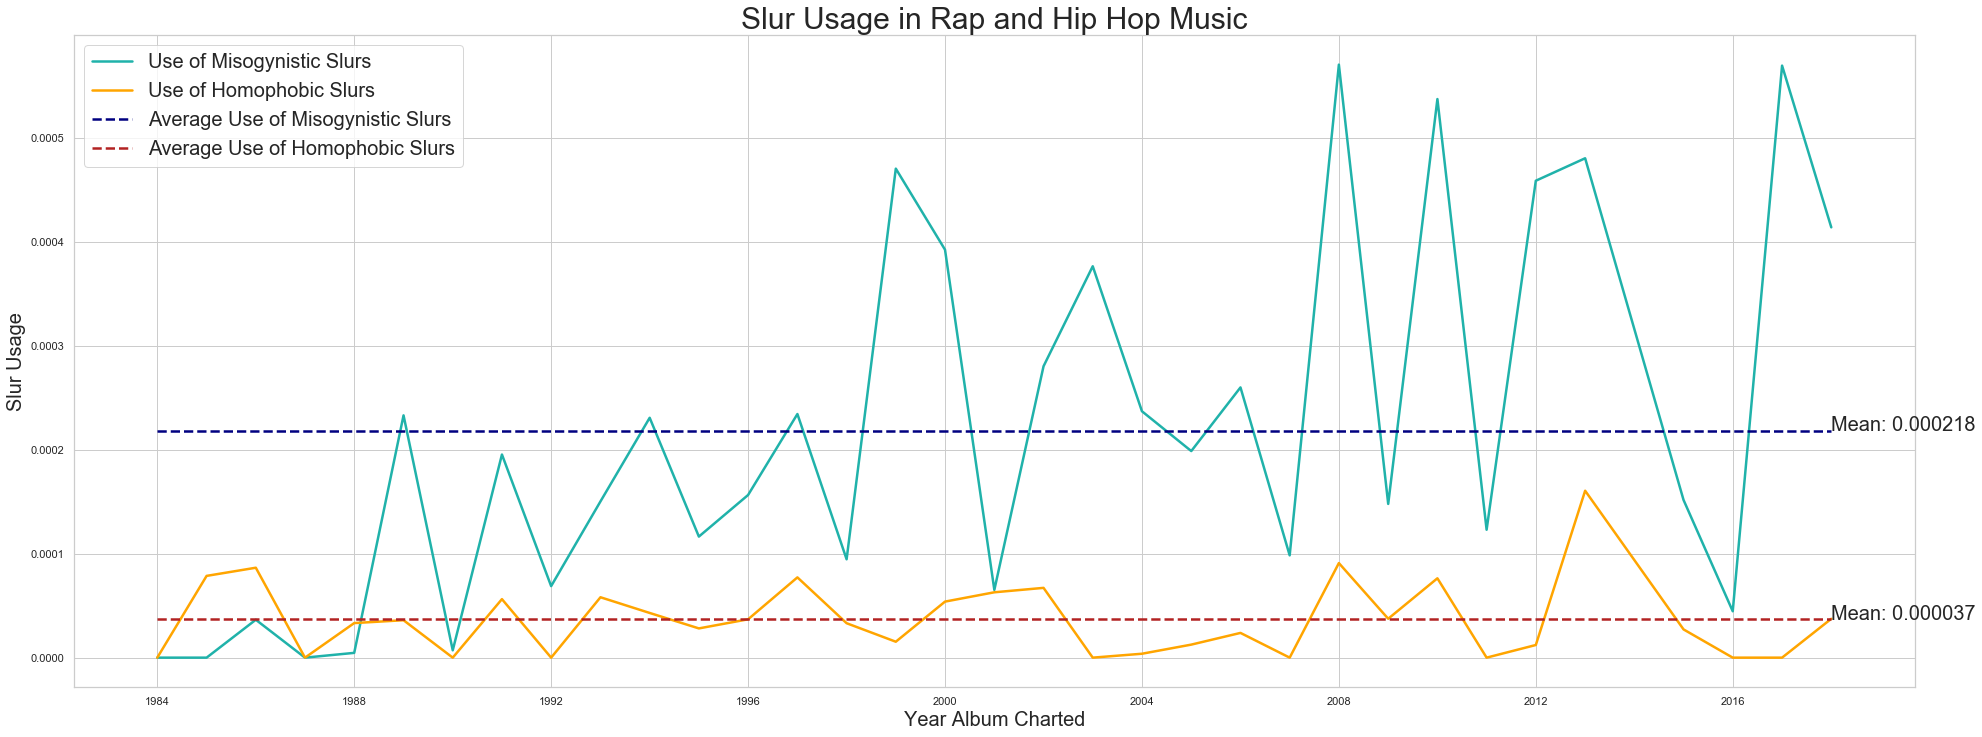

In [212]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(33, 12)})
sns.set_style("whitegrid")
#sns.set_palette(sns.husl_palette(2, h = .6, l = .6))

plot_df = albums_df.groupby(['album_year']).mean()
mean_misogyny = [(plot_df['album_misogyny']).mean()]*len(plot_df)
mean_homophobia = [(plot_df['album_homophobia']).mean()]*len(plot_df)

mean_misogyny_df = pd.DataFrame(mean_misogyny, index = plot_df.index)
mean_homophobia_df = pd.DataFrame(mean_homophobia, index = plot_df.index)

fig, ax1 = plt.subplots()
ax1.plot(plot_df['album_misogyny'], linewidth = 2.5, color = 'lightseagreen')
ax1.plot(plot_df['album_homophobia'], linewidth = 2.5, color = 'orange')
ax1.plot(mean_misogyny_df, linestyle = 'dashed', linewidth = 2.5, color = 'navy')
ax1.plot(mean_homophobia_df, linestyle = 'dashed', linewidth = 2.5, color = 'firebrick')
ax1.text(max(plot_df.index),plot_df['album_misogyny'].mean(), fontsize=20, 
         s = 'Mean: {:5f}'.format((plot_df['album_misogyny']).mean()))
ax1.text(max(plot_df.index),plot_df['album_homophobia'].mean(), fontsize=20, 
         s = 'Mean: {:5f}'.format((plot_df['album_homophobia']).mean()))
ax1.set_xlabel('Year Album Charted', fontsize = 20)
ax1.set_ylabel('Slur Usage', fontsize = 20)
ax1.legend(['Use of Misogynistic Slurs', 'Use of Homophobic Slurs', 
            'Average Use of Misogynistic Slurs', 'Average Use of Homophobic Slurs'], fontsize = 20)
ax1.set_title('Slur Usage in Rap and Hip Hop Music', fontsize = 30)

**Insight**: The use of misogynistic slurs in rap and hip hop lyrics has increased over time. 

It appears as though the variation seen in misogyny is greater than the variation seen in homophobia. To confirm:

In [134]:
import statistics as stats

print('Standard Deviation of Misogyny: {:5f}\nStandard Deviation of Homophobia:{:5f}'.format(stats.stdev(plot_df['album_misogyny']),
                                                                                        stats.stdev(plot_df['album_homophobia'])))


Standard Deviation of Misogyny: 0.000178
Standard Deviation of Homophobia:0.000036


**Insight**: Compared to homophobia in rap and hip hop lyrics, misogyny in this genre's lyrics has a greater standard deviation, indicating that there is a greater variation in the usage of misogynistic slurs compared to the usage of homophobic slurs.

In [215]:
most_homophobic = list(albums_df.groupby(['album_artist']).mean()['album_homophobia'].sort_values(ascending = False)[:3].index)
most_misogynistic = list(albums_df.groupby(['album_artist']).mean()['album_misogyny'].sort_values(ascending = False)[:3].index)

print('Most Homophobic Artists:')
for artist in most_homophobic:
    album_number = len(albums_df[albums_df.album_artist == artist])
    homophobia = albums_df[albums_df.album_artist == artist]['album_homophobia'].mean()
    print('Artist: {}\nAlbums in Dataset: {}\nAverage Homophobia: {:5f}\n'.format(artist, album_number, homophobia))

print('-----------------------\n\nMost Misogynistic Artists:')
for artist in most_misogynistic:
    album_number = len(albums_df[albums_df.album_artist == artist])
    misogyny = albums_df[albums_df.album_artist == artist]['album_misogyny'].mean()
    print('Artist: {}\nAlbums in Dataset: {}\nAverage Misogyny: {:5f}\n'.format(artist, album_number, misogyny))

Most Homophobic Artists:
Artist: Snoop Doggy Dogg
Albums in Dataset: 1
Average Homophobia: 0.000232

Artist: Missy “Misdemeanor” Elliott
Albums in Dataset: 1
Average Homophobia: 0.000152

Artist: Eminem
Albums in Dataset: 7
Average Homophobia: 0.000094

-----------------------

Most Misogynistic Artists:
Artist: Lil Wayne
Albums in Dataset: 1
Average Misogyny: 0.001603

Artist: D12
Albums in Dataset: 1
Average Misogyny: 0.000756

Artist: Post Malone
Albums in Dataset: 1
Average Misogyny: 0.000745



**Insight**: The analysis found Snoop Dogg (known as Snoop Doggy Dogg when *Doggystyle* was released), Missy Elliott, and Eminem to be the most homophobic artists in this dataset. Similarly, the analysis found Lil Wayne, D12 (hip-hop group from Detroit including Eminem), and Post Malone to be the most misogynistic artists in this dataset.

In [211]:
most_homophobic = list(albums_df.groupby(['album_name']).mean()['album_homophobia'].sort_values(ascending = False)[:3].index)
most_misogynistic = list(albums_df.groupby(['album_name']).mean()['album_misogyny'].sort_values(ascending = False)[:3].index)

print('Most Homophobic Albums:')
for album in most_homophobic:
    current_data = albums_df[albums_df.album_name == album]
    artist = list(current_data['album_artist'])[0]
    year = list(current_data['album_year'])[0].strftime("%Y")
    homophobia = list(current_data['album_homophobia'])[0]
    print('Album: {}\nArtist: {}\nYear: {}\nAlbum Homophobia: {:5f}\n'.format(album, artist, year, homophobia))
    
print('-----------------------\n\nMost Misogynistic Albums:')
for album in most_misogynistic:
    current_data = albums_df[albums_df.album_name == album]
    artist = list(current_data['album_artist'])[0]
    year = list(current_data['album_year'])[0].strftime("%Y")
    misogyny = list(current_data['album_misogyny'])[0]
    print('Album: {}\nArtist: {}\nYear: {}\nAlbum Misogyny: {:5f}\n'.format(album, artist, year, misogyny))

Most Homophobic Albums:
Album: Doggystyle
Artist: Snoop Doggy Dogg
Year: 1993
Album Homophobia: 0.000232

Album: 808’s and Heartbreak
Artist: Kanye West
Year: 2008
Album Homophobia: 0.000225

Album: Raising Hell
Artist: Run-D.M.C.
Year: 1986
Album Homophobia: 0.000173

-----------------------

Most Misogynistic Albums:
Album: Tha Carter III
Artist: Lil Wayne
Year: 2008
Album Misogyny: 0.001603

Album: 2001
Artist: Dr. Dre
Year: 1999
Album Misogyny: 0.000966

Album: The Marshall Mathers LP
Artist: Eminem
Year: 2000
Album Misogyny: 0.000784



**Insight**: The analysis found that *Doggystyle*, *808's and Heartbreak*, and *Raising Hell* are the most homophobic albums in the dataset. Similarly, the analysis found that *Tha Carter III*, *2001*, and *The Marshall Mathers LP* are the most misogynistic albums in the dataset. 

In [214]:
print(max(albums_df['album_year']) - min(albums_df['album_year']))

12419 days 00:00:00
